<Figure size 1000x600 with 0 Axes>

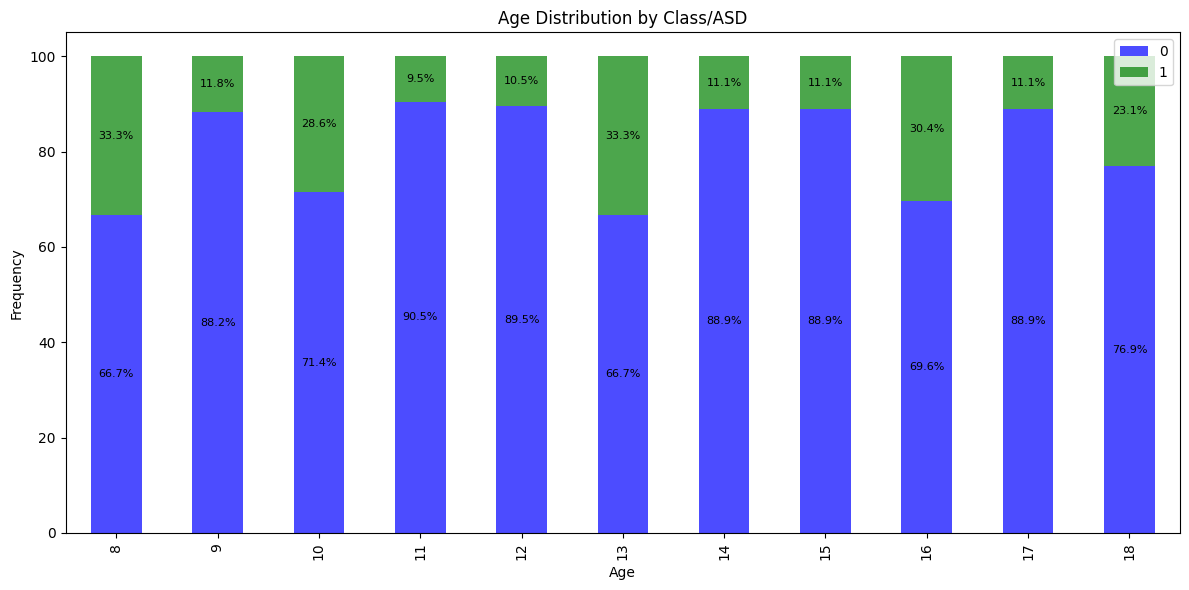

In [ ]:

import os
original_dir = os.getcwd()
if os.path.basename(original_dir) == "DataCharts":
    os.chdir(os.path.dirname(original_dir))
%run dataInfo.ipynb

import matplotlib.pyplot as plt
cleanTrain = train_df

cleanTrain = cleanTrain[(cleanTrain['age'] > 8) & (cleanTrain['age'] < 18)]
cleanTrain['age'] = cleanTrain['age'].round(0).astype(int)

age_class_counts = cleanTrain.groupby(['age', 'Class/ASD']).size().unstack(fill_value=0)
age_class_percentages = age_class_counts.div(age_class_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))

ax = age_class_percentages.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'green'], alpha=0.7)
plt.legend(['Class/ASD = yes', 'Class/ASD = no'], title='Class/ASD')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=8)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Class/ASD')
plt.legend()
plt.tight_layout()
plt.show()

